<a href="https://colab.research.google.com/github/sanskar-decoder/Machine-Learning-Practice/blob/main/DecissionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')




Loading the dataset from google drive

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Khasi/Fruit Classification.csv')



# Exploratory Data Analysis (EDA)


---

IT is the process of analyzing datasets to summarize their main characteristics, often with visualizations. It's a crucial step in data preprocessing to understand the data better, uncover patterns, and prepare it for modeling.

Basic understanding of  data

In [11]:
print(f'Total columns in dataset :{data.shape[1]}')
print(f'Total Rows in dataset :{data.shape[0]}')

Total columns in dataset :3
Total Rows in dataset :100


Basic information of dataset

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Color   100 non-null    object
 1   Size    100 non-null    object
 2   Fruit   100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


**Value count based on Color**

In [14]:
data.value_counts('Color')

,count
Color,
Red,39
Green,33
Yellow,28


Value counts based on Fruits

In [15]:
data.value_counts('Fruit')

,count
Fruit,
Apple,50
Banana,50


Value count based on Size

In [16]:
data.value_counts('Size')

,count
Size,
Small,37
Large,34
Medium,29


In [17]:
data.head(4)

,Color,Size,Fruit
0,Red,Large,Apple
1,Green,Large,Banana
2,Red,Medium,Banana
3,Red,Large,Apple


#  Removing unnecessary columns

In [6]:
data=data.drop('Unnamed: 0',axis=1)

In [7]:
data

,Color,Size,Fruit
0,Red,Large,Apple
1,Green,Large,Banana
2,Red,Medium,Banana
3,Red,Large,Apple
4,Red,Large,Apple
...,...,...,...
95,Green,Large,Apple
96,Green,Medium,Apple
97,Green,Large,Apple
98,Yellow,Small,Banana


**Checking for missing value**

There is no missing value in dataset.

In [19]:
data.isna().sum()

,0
Color,0
Size,0
Fruit,0


UNDERSTANDING THE DISTRIBUTION.

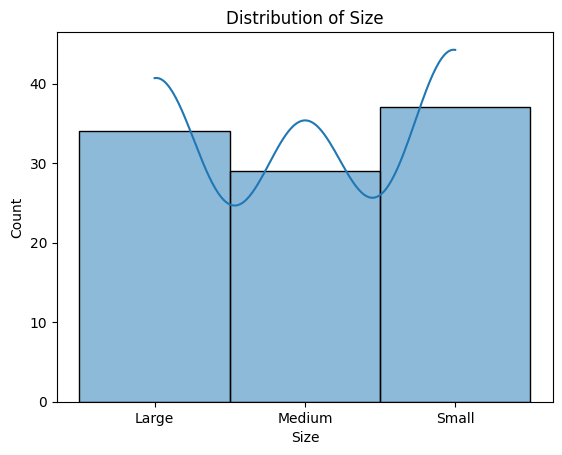

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical data
sns.histplot(data['Size'], kde=True)
plt.title('Distribution of color')

plt.show()



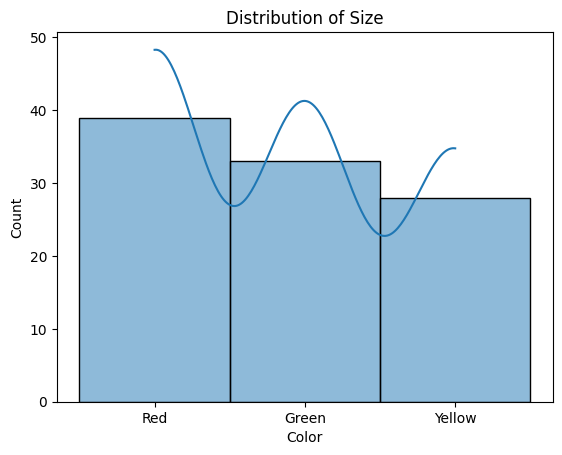

In [29]:
sns.histplot(data['Color'], kde=True)
plt.title('Distribution of Size')

plt.show()

# **Problem statment** **:-**Based on color and size we predict the fruit as per our data set it might be apple or bannana.

To solve this classification problem i choose Decission tree.

In [20]:
from sklearn.tree import DecisionTreeClassifier

for our convinence we do feature Encoding.

In [44]:

data['Color'] = data['Color'].map({'Green': 0, 'Yellow': 1, 'Red': 2})
data['Size'] = data['Size'].map({'Small': 0, 'Medium': 1, 'Large': 2})
data['Fruit'] = data['Fruit'].map({'Apple': 0, 'Banana': 1})

In [45]:


X = data[['Color', 'Size']]  # Features
y = np.array(data['Fruit'])            # Target variable

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [47]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((70, 2), (30, 2), (70,), (30,))

In [48]:
model=DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [57]:
prediction=model.predict(X_test)
result=[]
for i in prediction:
  if i==0:
    result.append('Apple')
  else:
    result.append('Banana')


# prediction


In [70]:
print('Apple :',result.count('Apple'))
print('Banana :',result.count('Banana'))

Apple : 16
Banana : 14


In [65]:
y_result=[]
for i in prediction:
  if i==0:
    y_result.append('Apple')
  else:
    y_result.append('Banana')


In [71]:
print('Apple :',y_result.count('Apple'))
print('Banana :',y_result.count('Banana'))

Apple : 16
Banana : 14


In [73]:
from sklearn.metrics import accuracy_score


In [75]:
print("Accuracy:", accuracy_score(y_test,prediction) * 100)

Accuracy: 63.33333333333333


Let check how our algorithm split our dataset.

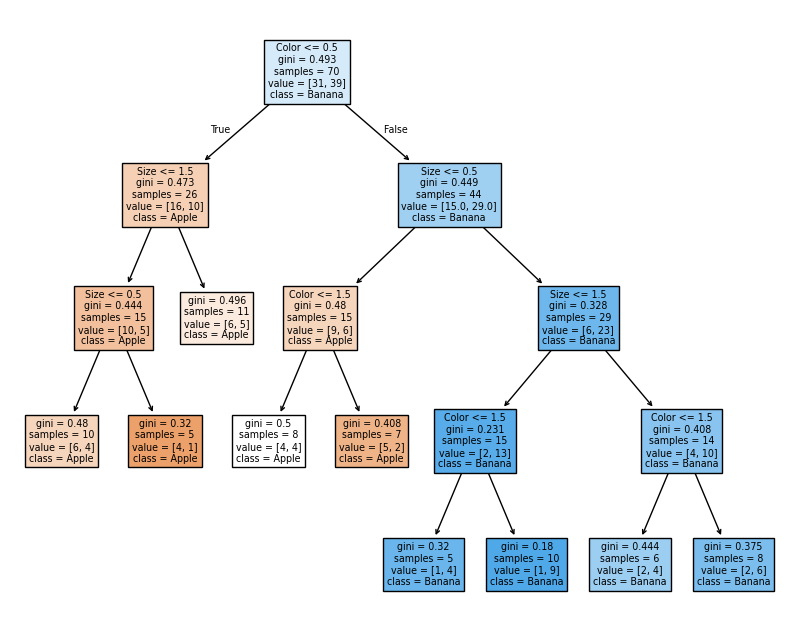

In [76]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(model, filled=True, feature_names=['Color', 'Size'], class_names=['Apple', 'Banana'])
plt.show()